In [1]:
import pandas as pd
data= pd.read_csv(
    "winequalityN.csv",
    names=["type","fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"])

threshold = 6  # Define your threshold

data['quality'] = (data['quality'] > threshold).astype(int)
data['type'] = data['type'].apply(lambda x: 0 if x=='white' else 1)
counts = data['quality'].value_counts()
target_count = min(counts)
balanced_data = pd.concat([
    data[data['quality'] == 0].sample(target_count, replace=True),
    data[data['quality'] == 1].sample(target_count, replace=True)
])
balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)
balanced_data['quality'].value_counts()
data = balanced_data
features = data.copy()
features.fillna(0, inplace=True)
labels = features.pop('quality')
import numpy as np
features = np.array(features)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.05, random_state=0)

In [2]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
from sklearn.linear_model import Perceptron

In [3]:
parameters={'penalty':('l2','l1','elasticnet',None),'alpha':(0,1,2),'l1_ratio':(0,1,2),'fit_intercept':(True,False),'tol':(0,1,None),'shuffle':(True,False),'eta0':(0,1,2)}

In [4]:
clf = GridSearchCV(Perceptron(), parameters)
import warnings
warnings.filterwarnings("ignore")
clf.fit(X_train, y_train)

GridSearchCV(estimator=Perceptron(),
             param_grid={'alpha': (0, 1, 2), 'eta0': (0, 1, 2),
                         'fit_intercept': (True, False), 'l1_ratio': (0, 1, 2),
                         'penalty': ('l2', 'l1', 'elasticnet', None),
                         'shuffle': (True, False), 'tol': (0, 1, None)})

In [5]:
predictions = clf.predict(X_test)

In [6]:
import sklearn
sklearn.metrics.roc_curve(y_test,predictions)

(array([0.        , 0.65217391, 1.        ]),
 array([0.        , 0.93220339, 1.        ]),
 array([inf,  1.,  0.]))

In [7]:
sklearn.metrics.roc_auc_score(y_test,predictions)

0.6400147383935151

In [9]:
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[0, 4],
       [0, 2]], dtype=int64)

In [8]:
sklearn.metrics.log_loss(y_test,predictions)

13.797961063021408

In [9]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.6171875


In [10]:
sklearn.metrics.f1_score(y_test,predictions,average=None)

array([0.49484536, 0.6918239 ])

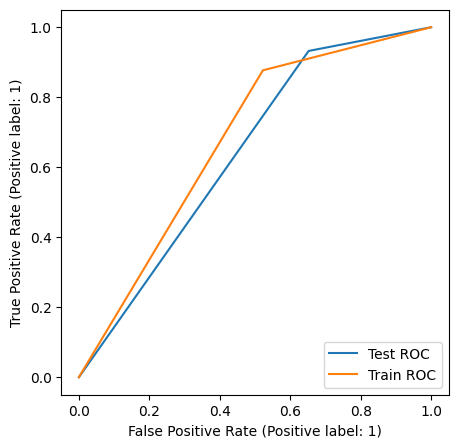

In [12]:
predictions_train = clf.predict(X_train)
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
RocCurveDisplay.from_predictions(y_test,predictions, ax=ax, label='Test ROC')
RocCurveDisplay.from_predictions(y_train,predictions_train, ax=ax, label='Train ROC')